# CSC312 – Machine Learning

# Assignment 1 – Linear Regression

This is the first assignment of the course. **Extremely important note:** You HAVE to run this notebook with a **Python 3 kernel**; running it with a Python 2 kernel will yield very unpredictable results, and your potentially correct solutions may noted as being wrong because of this fact. So make sure to run it with a **Python 3 kernel**.

Given that this is the first practical, I've prepared this interactive notebook for you. The notebook gives you tasks to do which involve, in most or all cases, filling out the body of a function that does something specific, and after each task that is to be marked (except for the plotting questions and the learning rate questions), I've provided a feedback cell that you can select and run that will provide you with instant feedback about whether your work appears to be doing the right thing just to give you a sense of your progress for your personal benefit. Essentially, the feedback cells call the function that you will have to fill out with code and check to see whether the output is apparently correct.

***

Please note that the interative feedback cells **do not update automatically**. They only execute (and update) once you run them. So you can either select a specific cell after a problem and run it, or you can run all the cells. Either way, after every change, you will need to run the relevant feedback cell(s) to check your progress.

Also note that if you haven't completed a task yet at all, running its interactive feedback cell may throw an error. This is, for example, because (amongst other things) it is calling a function that you should have completed that hasn't been completed yet. So if that happens, now you know why.

If things get messy, you can always clear the output cells to clean things up. You can do this by means of the ```Edit``` $\rightarrow$ ```Clear Outputs of All Cells``` menu entry. Don't worry: this won't delete any of your code, but only the output that has been produced by running that code.

You need to work on this sheet from the top going sequentially down. In many (probably all) cases, cells lower down depend on functions/variables created and correctly set higher up in the sheet. This will prevent confusion and will help ensure that the notebook works correctly.

Make 100% sure to NOT hard-code values for the data sets you've been given here and also to follow the instructions very carefully. This includes things like the number of samples (```m```) and, for multivariate linear regression, the number of features. In almost all cases, the interactive feedback cells use other (potentially multi-dimensional) data with your function to make sure that it is flexible. Use this assignment as an opportunity to learn and apply everything you’ve learnt in class. When marking the work, I will 100% use different datasets, and hard-coding will result in disappointment and low marks. Ok, now on to the assignment.

The assignment consists of two parts with two different data sets. The first part deals with univariate (simple) linear regression while the second part delves into multivariate linear regression. Follow the progression of the sheet to unravel the wonders of linear regression.

Note that for the rest of this assignment, I've  clearly indicated the parts that will earn you marks by putting in a **[x marks]** just after the question. In most or all such code cells that you need to fill in, I've provided a template function that you need to complete, and I've also indicated the parts where you need to put in code to make things work; only make changes to the code where I've specified, which in many cases will be between the two comment tags that might say something like **```#Fill in below```** and **```#Stop filling in here```**.  **Don't** make any edits to function templates/declarations/inputs or even to the return statements. My auto-marker will assume the function names, input variables and return variables that are provided below. Only edit the body of the function exactly where specified in each part of the assignment. Please also read the instructions very carefully as some questions may work slightly differently, but the instructions are always clearly given.

Also note that my data loading cells assume that the files ```data1.csv``` and ```data2.csv```, as well as ```utils.py``` are in the same directory as this notebook. These files have also been uploaded to iKamva along with this sheet. Download and place in the appropriate folder.

#### Submission:

You will submit your finished jupyter notebook (```.ipynb```) file to iKamva before the deadline.

Please adhere to the following very simple instructions when making a submission:


1. Make absolutely sure to fill in your student number in the cell below this one. This is necessary for auto-marking purposes.


2. If you've submitted your file multiple times on iKamva, there will be multiple copies of the file on iKamva. You need to make sure that there is only one copy on iKamva which is your final preferred copy. Delete all the others. If you don't delete them, we will have no way of knowing which to mark, and will have to mark one at random.


3. **DO NOT** upload the data files (```data1.csv``` and ```data2.csv```) or ```utils.py``` as part of your submission. Only upload your jupyter notebook (```.ipynb```) file.


4. **DO NOT** compress or zip your file in anyway. Upload the original raw ```.ipynb``` file.


5. If your submission is late, even by a few moments, it will not be accepted or marked. We've talked about this at length. God Lord, I wish students would believe me on this. I literally won't accept it (but we'll both just feel bad). I've given you plenty time to submit this work so please aim to **submit 24 hours before the deadline** to avoid disappointment to do with e.g. lack of Internet connectivity in res, load-shedding, skin-shedding, water-shedding, tsnamis and other natural disasters, taxi strikes, lunar eclipses, solar flares etc. There is absolutely no excuse that will be accepted, given the amount of time I've given you. If your work is late, please refrain from emailing it to me; I will **not** accept your work; period. It's for your own good (you'll thank me one day in the future).


Good luck and enjoy this notebook (which took me a **LOOOOOOOOOOOOT** of time to create #TorturedSoul)!

### VERY IMPORTANT: YOUR STUDENT NUMBER

Please set the mystudentnumber variable below to your student number.

In [102]:
MYSTUDENTNUMBER = "4129581" #Please set this as a STRING.

Some initialization code. Just run it and DON'T remove or change it:

In [103]:
#Run this snippet before moving on to the next parts

DEBUG = 0
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

#Initialize environment: DON'T REMOVE!
environ_init = "7721hdjfh56nkf771!190sd1hdjfhjhs0071!skskhb0091hdjfh77262jhdywyyuqkjbsdu0811hdjfhnkf771!hslknhd7612oi7!#daiw@_ebcjfibjd$##*Dkdjhq91hdj1hdjfhfhjhdfi1998nkf771!7nkknkf771!@#!@likkhdh1hdjfhuhs919872863jnjhg23"


# Part 1 - Univariate (Simple) Linear Regression

An ice-cream chain has observed a trend, but needs you to confirm it for them: they believe that as the temperature  (in °C) rises above 20°C on a given day, their ice cream sales profit (in Rand) that day soars. They have collected data in this regard i.e. temperature above 20°C on a given day (in °C) and the associated sweet profit (in 1000s of Rand) that they made that day (and this could be negative meaning they made a sweet loss on that day). They want to obtain a predictive model that can help them plan accordingly and to understand how things work. In this part, you're going to use linear regression to obtain a model that can predict the total profit based on the expected temperature in a day above 20°C.

## 1.1 Reading in and Readying the Data

The first step is to read in the data. The data for this part is provided in a ```csv``` file called ```data1.csv``` which contains two columns of data: the first column represents the total sweet profit in 1000s of thousands of Rand (which is what we're trying to predict); the second column represents the temperature above 20°C (which is the feature we're using to make predictions). I've graciously put in the code to import ```numpy``` and to import the data as a ```numpy``` array into the variable ```DATA``` (because the focus here is on machine learning, not on data import).

In [104]:
#Run this snippet before moving on to the next parts
#Don't change anything in this code snippet. But do look through it to see what it's doing.

import numpy as np
np.set_printoptions(suppress=True) #This just prevents numpy from jumping into scientific display mode for very large/small numbers

DATA = np.loadtxt('data1.csv',delimiter=",")

The data file consists of two columns. The data is displayed below to demonstrate that it is read in correctly.

In [105]:
DATA

array([[ 9.48,  5.68],
       [ 5.65,  3.73],
       [10.36,  6.15],
       [13.24,  8.84],
       [ 7.52,  3.43],
       [ 5.01,  3.43],
       [12.83,  9.01],
       [ 9.48,  6.52],
       [ 2.93,  2.71],
       [ 9.61,  5.82],
       [ 5.54,  2.73],
       [ 5.14,  2.72],
       [ 7.62,  4.9 ],
       [-2.78, -1.73],
       [-0.53, -1.15],
       [ 4.24,  2.42],
       [ 1.75,  1.04],
       [ 8.02,  5.12],
       [ 3.97,  1.36],
       [ 4.18, -0.19],
       [13.12,  8.66],
       [ 6.48,  3.46],
       [ 7.16,  4.36],
       [-1.58, -0.23],
       [ 4.78,  2.48],
       [ 7.53,  4.5 ],
       [ 6.09,  0.61],
       [ 8.21,  5.31],
       [ 5.05,  2.31],
       [ 5.78,  3.26],
       [ 2.84,  2.3 ],
       [16.12,  9.85],
       [ 8.07,  4.11],
       [ 3.96,  0.9 ],
       [ 8.93,  6.68],
       [ 4.22,  0.4 ],
       [ 5.73,  4.8 ],
       [ 0.04, -1.88],
       [ 4.97,  0.07],
       [ 6.3 ,  4.76],
       [ 9.1 ,  6.43],
       [ 7.83,  4.68],
       [ 5.78,  3.8 ],
       [ 3.

## 1.2 Setting ```m``` and ```n```

Fill in code in the function template ```obtainNandM(data)``` below that accepts, as input, a data array ```data``` *with an arbitrary number of rows and columns*; the function then returns the number of examples ```m``` and the number of features ```n```, respectively.

Assume that the first column of ```data``` will always contain the output variable $y$, while the remaining columns (which can be one or more) represent the feature(s) $X$. Note, then, that ```m``` will be the number of rows in ```data``` while ```n``` will be one less than the number of columns in ```data``` because the data format we're using here has the first column as the output and the remaining columns are the features. This function will be marked.

**[0.5 marks]**

In [106]:
def obtainNandM(data):

    n = 0 #Set this correctly below
    m = 0 #Set this correctly below

    #Fill in below
    n = data.shape[1]-1
    m = data.shape[0]
    #Stop filling in here
    return n,m

N,M = obtainNandM(DATA)

Note that if you run ```obtainNandM``` by passing in ```DATA``` that we read in from the csv file before, you should end up with $n=1$ and $m=87$ because it contains 1 feature and 87 examples. But note that if you were to pass in a data variable with more features, it should accomodate that. E.g. if you passed in the data array below, you *should* end up with $n=4$ and $m=14$:

```DATANFEAT = np.array([[18, 7,65,51,93], [18,34,23,49,30], [48,69,50,89,13], [35,44,86,98,36], [28,32,74,58,11], [ 4,42,97,97,54], [52,19,75,46, 2], [70, 2,21,76,57], [10,73,43,44,71], [74,33, 5,62,51], [ 2,51, 3,40, 6], [76,34,17, 2,89], [76, 9,45,55,74], [ 3,75,96,60,94]])```

In [107]:
#This cell is for YOU to try out your function
DATANFEAT = np.array([[18, 7,65,51,93], [18,34,23,49,30], [48,69,50,89,13], [35,44,86,98,36], [28,32,74,58,11], [ 4,42,97,97,54], [52,19,75,46, 2], [70, 2,21,76,57], [10,73,43,44,71], [74,33, 5,62,51], [ 2,51, 3,40, 6], [76,34,17, 2,89], [76, 9,45,55,74], [ 3,75,96,60,94]])

def obtainNandM(data):

    n = 0 #Set this correctly below
    m = 0 #Set this correctly below

    #Fill in below
    n = data.shape[1]-1
    m = data.shape[0]
    print(n,m)
    #Stop filling in here
    return n,m

N,M = obtainNandM(DATA)


1 87


Select and run the cell below to see whether your code working correctly. The cell below indicates whether your ```obtainNandM``` function apparently works correctly at this point. Note that the function is tested on other multi-dimensional data to ensure it is flexible. Anyway, run it and see.

In [108]:
import utils
import importlib
importlib.reload(utils)

params = utils.params1(obtainNandM)
utils.testCell(params)


7 240
7 240
______________________________

Test: Check m
______________________________
Result: Passed! Mark: 0.25
______________________________

______________________________

Test: Check n
______________________________
Result: Passed! Mark: 0.25
______________________________

Looks good from the few tests done! Marks: 0.5


0.5

## 1.3 Obtaining ```X``` and ```y```

Now fill in the function template ```obtainYandX(data)``` below to set the variables ```x``` (containing the feature(s)) and ```y``` (containing the intended output). Note that ```y``` will be the first column in the data, and ```x``` will be all remaining columns (whether it is one or more).

**Note:** When indexing into ```data``` in the function below, ensure that you don't necessarily assume that the features $X$ are in the 2nd column; rather assume that features $X$ will be all columns from the second column onwards (however many they may be; either 1 or more).

You can do this by indexing into the array ```data```. The following examples on a hypothetical array ```A``` might give you clues on how this can be done:

- ```numpy``` indexing for 2D arrays takes the following form: ```A[{row_start}:{row_end},{col_start}:{col_end}]``` where ```row_start``` specifies the starting row index to start from, ```row_end``` specifies the row index to end at (*not* including ```row_end``` itself); the same with ```col_start``` and ```col_end``` for columns. I've put curly brackets around each of the indices because they can be omitted and they are optional (more on this later).

    - Therefore, ```A[2:5,0:1]``` means row indices 2 up to and not including row index 5 of column index 0 up to and not including column index 1. So this actually means row indices 2 to 4 of column index 0 only.
    - ```A[1:4,1:7]``` means row index 1 up to and not including row index 4 of column indices 1 up to and not including column index 7. So this actually means row indices 1 to 3 of column indices 1 to 6.
    - ```A[3:4,1:5]``` means row index 3 only, columns 1 to 4.
<br><br>
- As mentioned before, ```row_start```, ```row_end```, ```col_start``` and ```col_end``` are all optional and can be omitted. If ```row_start``` or ```col_start``` are omitted, ```numpy``` assumes that we are starting from row/col index 0. If ```row_end``` or ```col_end``` are omitted, ```numpy``` assumes that we are ending at the last row/col index in the array, whatever it may be.
    - Therefore, saying ```A[2:,1:3]``` means row indices 2 onwards, and column indices 1 and 2.  
    - ```A[3:6,:3]``` means row indices 3 to 5, and column indices 0 to 2.
    - ```A[2:,:3]``` means row indices 2 onwards, and column indices from 0 to 2.
    - ```A[3:, 5:]``` means rows indices 3 onwards, and column indices 5 onwards
    - ```A[:,3:4]``` means all rows and column index 3 only.
    - ```A[:5,:]``` means row indices 0 to 4, and all columns.
    - ```A[:,:]``` means all rows, and all columns i.e. the whole array. Actually, synonymous with `A`.


Keep in mind that when trying to return a single column or row, you should specify the starting column/row index *and* the ending column/row index; if you don't do this, you'll end up with a 1D array which will cause big problems later e.g. if you want to return only column index 2 for all rows, you would say ```A[:,2:3]```.

Ok after all that, just a reminder that you need to now fill in the function template ```obtainYandX(data)``` below to set the variables ```x``` (containing the feature(s)) and ```y``` (containing the intended output). Note that ```y``` will be the first column in the data, and ```x``` will be all remaining columns from column index 1 onwards.

**[0.5 mark]**

In [109]:
def obtainYandX(data):

    n,m = obtainNandM(data) #You might need n and/or m. Use them if you wish

    x = 0 #Set this correctly below
    y = 0 #Set this correctly below

    #Fill in below
    y = data[:,0:1]
    x = data[:,1:]



    #Stop filling in here
    return y,x

Y,X = obtainYandX(DATA)

1 87


Note that if you run ```obtainYandX``` by passing in ```DATA``` that we read in from the csv file before, you should end up with $y$ containing the first column of ```DATA```, and $X$ containing the second column. But note that if you were to pass in a data variable with more features, it should accomodate that. E.g. if you passed in the data array ```DATANFEAT``` below, you *should* end up with $y$ containing the first column and $X$ containing four columns.

Given:

```DATANFEAT = np.array([[18, 7,65,51,93], [18,34,23,49,30], [48,69,50,89,13], [35,44,86,98,36], [28,32,74,58,11], [ 4,42,97,97,54], [52,19,75,46, 2], [70, 2,21,76,57], [10,73,43,44,71], [74,33, 5,62,51], [ 2,51, 3,40, 6], [76,34,17, 2,89], [76, 9,45,55,74], [ 3,75,96,60,94]])```

You should get:

$y = $```np.array([[18], [18], [48], [35], [28], [ 4], [52], [70], [10], [74], [ 2], [76], [76], [ 3]])```

and

$X = $```np.array([[ 7,65,51,93], [34,23,49,30], [69,50,89,13], [44,86,98,36], [32,74,58,11], [42,97,97,54], [19,75,46, 2], [ 2,21,76,57], [73,43,44,71], [33, 5,62,51], [51, 3,40, 6], [34,17, 2,89], [ 9,45,55,74], [75,96,60,94]])```

In [110]:
#This cell is for YOU to try out your function
def obtainYandX(data):

    n,m = obtainNandM(data) #You might need n and/or m. Use them if you wish

    x = 0 #Set this correctly below
    y = 0 #Set this correctly below

    #Fill in below
    y = data[:,0:1]
    x = data[:,1:]
    print(y)


    #Stop filling in here
    return y,x

Y,X = obtainYandX(DATA)


1 87
[[ 9.48]
 [ 5.65]
 [10.36]
 [13.24]
 [ 7.52]
 [ 5.01]
 [12.83]
 [ 9.48]
 [ 2.93]
 [ 9.61]
 [ 5.54]
 [ 5.14]
 [ 7.62]
 [-2.78]
 [-0.53]
 [ 4.24]
 [ 1.75]
 [ 8.02]
 [ 3.97]
 [ 4.18]
 [13.12]
 [ 6.48]
 [ 7.16]
 [-1.58]
 [ 4.78]
 [ 7.53]
 [ 6.09]
 [ 8.21]
 [ 5.05]
 [ 5.78]
 [ 2.84]
 [16.12]
 [ 8.07]
 [ 3.96]
 [ 8.93]
 [ 4.22]
 [ 5.73]
 [ 0.04]
 [ 4.97]
 [ 6.3 ]
 [ 9.1 ]
 [ 7.83]
 [ 5.78]
 [ 3.47]
 [ 1.19]
 [ 2.53]
 [ 5.87]
 [ 9.85]
 [10.7 ]
 [-1.23]
 [ 7.81]
 [ 6.68]
 [ 2.45]
 [ 9.79]
 [13.08]
 [ 8.31]
 [ 3.92]
 [ 6.15]
 [ 9.5 ]
 [ 9.05]
 [ 3.1 ]
 [ 7.04]
 [ 3.02]
 [ 2.59]
 [10.77]
 [11.4 ]
 [ 7.06]
 [11.45]
 [ 7.38]
 [ 7.22]
 [ 9.16]
 [11.37]
 [ 7.84]
 [11.8 ]
 [-2.3 ]
 [12.03]
 [ 6.12]
 [ 7.25]
 [ 7.99]
 [ 0.28]
 [ 8.97]
 [ 8.06]
 [11.78]
 [ 3.59]
 [ 2.54]
 [ 4.88]
 [11.17]]


Select and run the cell below to see whether your code working correctly. The cell below indicates whether your ```obtainYandX``` function apparently works correctly at this point. Note that the function is tested on other multi-dimensional data to ensure it is flexible. Anyway, run it and see.

In [111]:
import utils
import importlib
importlib.reload(utils)

params = utils.params2(obtainYandX)
utils.testCell(params)


8 58
[[0.0444528 ]
 [0.25060251]
 [0.741584  ]
 [0.64450162]
 [0.65955746]
 [0.08859289]
 [0.58978762]
 [0.0218305 ]
 [0.70529672]
 [0.30468925]
 [0.17248192]
 [0.58822413]
 [0.98793936]
 [0.5894678 ]
 [0.73336624]
 [0.58432754]
 [0.80570572]
 [0.61783935]
 [0.95753648]
 [0.26547016]
 [0.22779013]
 [0.59468306]
 [0.81252816]
 [0.20619291]
 [0.49273003]
 [0.81246984]
 [0.32747824]
 [0.72167958]
 [0.45424393]
 [0.14632169]
 [0.73486249]
 [0.12197702]
 [0.81200537]
 [0.11192941]
 [0.51697579]
 [0.11196366]
 [0.87841084]
 [0.5428707 ]
 [0.86231302]
 [0.66374949]
 [0.77423686]
 [0.32172835]
 [0.9136859 ]
 [0.08880028]
 [0.78351448]
 [0.14265732]
 [0.65681884]
 [0.80820453]
 [0.23388833]
 [0.31247083]
 [0.45676588]
 [0.56372811]
 [0.31205695]
 [0.78253209]
 [0.67836067]
 [0.72969909]
 [0.79901235]
 [0.36326065]]
8 58
[[0.0444528 ]
 [0.25060251]
 [0.741584  ]
 [0.64450162]
 [0.65955746]
 [0.08859289]
 [0.58978762]
 [0.0218305 ]
 [0.70529672]
 [0.30468925]
 [0.17248192]
 [0.58822413]
 [0.98793

0.5

## 1.4 Plotting the Data

Ok now that we have the data (or some of it) available, let's make a plot. Plotting data can come in handy, but as discussed in class, can only really be applied when you've got a single feature. In the function `drawGraph` belowm, use the two matrices ```x``` and ```y``` to plot a scatter plot of Profit versus Temperature rise below. Preferably use``` matplotlib``` to do it. Search engines are your friend (preferably the ones that don't spy on you... wait, do those exist anymore...? Ok, preferably that at least don't blatantly tell you that they spy on you... #fixedit). Note: I've plotted some graphs further below in this worksheet. Maybe you can use those to help you...

**[2 marks]**

**Important: Don't modify ```x``` or ```y``` in any way in your function.**

If you did it correctly, you should see a plot that is somewhat similar to the Figure below. Hopefully you can see that the data is more or less linear. Next, we're going to start to fit a line to the data.


![data1plot.png](attachment:data1plot.png)

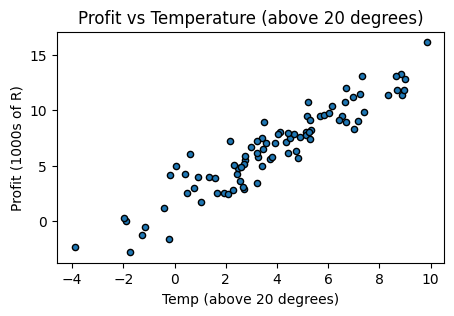

In [112]:
#Fill in below Import any libraries you may need for plotting inside the function here
import matplotlib.pyplot as plt
#Stop filling in here


def drawGraph(y,x):
    #Fill in below
    fig, ax = plt.subplots(figsize=(5, 3))
    ax.scatter(x,y, s=20, facecolor='C0', edgecolor='k')
    ax.set_title('Profit vs Temperature (above 20 degrees)')
    ax.set_xlabel('Temp (above 20 degrees)')
    ax.set_ylabel('Profit (1000s of R)')

    #Stop filling in here


    return

drawGraph(Y,X)

***

## 1.5 Iterative Methods for Computing the Cost and Gradient Descent (Slow)

We're first going to implement the hypothesis, the cost function and gradient descent using the iterative method (i.e. looping through samples).

### 1.5.1 Computing the Hypothesis With One Feature - Iterative Method

The hypothesis is basically a linear sum of a given $\Theta$ parameters with the features $X$. If we have just one example $x$, it is given by:

<center>$\large h_\theta(x) = \theta_1x + \theta_0$</center>

However, if we have more than one example, such as we currently do in our variable ```X``` (where each example is on a single row in ```X``` in this case), we can get the prediction for each example in $X$ as follows:

<center>$\large h_\theta(x^{(i)}) = \theta_1x^{(i)} + \theta_0$</center>

When doing this iteratively, we would need to loop through values of $i$ and compute each prediction separately. Go ahead and do exactly this in the function `predHIter` below. I've created an array ```h``` of the same size as ```x``` to store the predictions. You need to loop through values of ```i``` and set each row ```h[i,0]``` of ```h``` correctly.

**[0.5 marks]**

In [113]:
def predHIter(theta,x,m):

    h = np.zeros((m,1)) #Set this variable correctly below - an array h to store the predicted value for each row x

    #Fill in below - loop through every row of x (x[i,0]) and compute and set h[i,0].
    for i in range(m):
      h[i,0]= (theta[0] + np.sum(theta[1:] * x[i,:])).item()

    #Stop filling in here

    return h


Note that if you run the function you've written with $\Theta = (\theta_0 = 1, \theta_1 = 2)$ applied to ```X```, and if you did it right, you should be getting (and seeing) a $(87 \times 1)$ matrix of predicted values, as follows:

$
[[12.36], [ 8.46], [13.3 ], [18.68], \ldots , [ 6.12], [ 4.34], [ 6.22], [14.94]]
$

If not, re-visit the function above. It needs to work correctly for the rest of this assignment to work correctly. Feel free to try out your function for your own purposes in the cell below.

In [114]:
#This code snippet is for YOU
#It just calls the hypothesis function. Feel free to play around with this to see what your hypothesis function is doing.

THETA = np.array([[1],[2]]) #Change this to whatever thetas you like


PREDSITER = predHIter(THETA,X,M) #I wouldn't advise changing this
print(np.array2string(PREDSITER, separator=',').replace("\n","")) #I wouldn't advise changing this - I'm using the array2string function to be able to display the array in a more visually accessible format


[[12.36], [ 8.46], [13.3 ], [18.68], [ 7.86], [ 7.86], [19.02], [14.04], [ 6.42], [12.64], [ 6.46], [ 6.44], [10.8 ], [-2.46], [-1.3 ], [ 5.84], [ 3.08], [11.24], [ 3.72], [ 0.62], [18.32], [ 7.92], [ 9.72], [ 0.54], [ 5.96], [10.  ], [ 2.22], [11.62], [ 5.62], [ 7.52], [ 5.6 ], [20.7 ], [ 9.22], [ 2.8 ], [14.36], [ 1.8 ], [10.6 ], [-2.76], [ 1.14], [10.52], [13.86], [10.36], [ 8.6 ], [ 7.46], [ 0.2 ], [ 4.88], [ 6.48], [15.82], [11.42], [-1.54], [11.3 ], [ 6.94], [ 5.14], [13.08], [15.66], [15.04], [ 4.14], [ 7.4 ], [11.34], [15.32], [ 6.36], [ 8.16], [ 2.5 ], [ 1.94], [14.3 ], [17.66], [ 8.86], [15.48], [11.54], [ 5.34], [11.54], [18.78], [ 9.08], [18.94], [-6.82], [14.36], [ 9.84], [ 7.46], [ 9.88], [-2.92], [ 7.96], [11.5 ], [18.4 ], [ 6.12], [ 4.34], [ 6.22], [14.94]]


Select and run the cell below to see whether your code working correctly. The cell below indicates whether your ```predHIter``` function apparently works correctly at this point. Note that the function is tested on other data (with only feature) to ensure it is flexible. Anyway, run it and see.

In [115]:
import utils
import importlib
importlib.reload(utils)

params = utils.params3(predHIter)
utils.testCell(params)


______________________________

Test: Check predictions on X
______________________________
Result: Passed! Mark: 0.5
______________________________

Looks good from the few tests done! Marks: 0.5


0.5

### 1.5.2 Computing the Cost With One Feature - Iterative Method

The cost function is a function that provides an exact measure (i.e. the cost) for how well a given line (the hypothesis) represented in terms of its parameters $\Theta$ fits a given set of data given by features $X$ and outputs $y$. The cost is given by:

<center>$\large J(\Theta)=\frac{1}{2m}\sum\limits_{i=0}^{m}\Big[h_\theta(x^{(i)}) - y^{(i)})\Big]^2$</center>

where $h_\theta(x^{(i)}))$ in this case (with only one feature) is given by:

<center>$\large h_\theta(x^{(i)}) = \theta_1x^{(i)} + \theta_0$</center>

so the cost function can also be written as:

<center>$\large J(\Theta)=\frac{1}{2m}\sum\limits_{i=0}^{m}\Big[\theta_1x^{(i)} + \theta_0 - y^{(i)}\Big]^2$</center>

To compute the cost iteratively, one can loop over each of the $m$ samples $(x^{(i)},y^{(i)})$ and:
   - Compute $\theta_1x^{(i)} + \theta_0 - y^{(i)}$;
   - Square the result;
   - Accumulate the sum of these values over all $m$ samples;
   - And finally divide the final sum by $2m$.


Below, go ahead and implement the **iterative solution** I've described above, in the ```getCostIter(theta, x, y, m)``` function I've fleshed out below, and make sure it returns the relevant cost as **a single float value** and NOT a matrix or array of any kind.

**[4 marks]**

In [116]:
def getCostIter(theta, x, y, m):

    cost = 0
    #Fill in below - there needs to be (at least one) loop in here
    addition = 0
    for i in range(m):
      pred = theta[0,0]
      for j in range(x.shape[1]):
        pred += theta[j+1,0] * x[i,j]


      error = (pred - y[i,0])**2
      addition += error
    cost = (addition / (2 * m))

    #Stop filling in here

    return np.squeeze(cost)#the cost as a single value - consider using the float() function just before returning it

Note that if you run the function you've written with the values $(\theta_0 = 1.87, \theta_1 = 1.23)$ (which are the approximate best-fit solutions to the data) and if you did it right, you should be seeing the value (yes a single value and NOT an array) ```0.9289940...```. If not, re-visit the function above. It needs to work correctly for some parts of the rest of this assignment to work correctly. Feel free to try out your function for your own purposes in the cell below.

In [117]:
#This code snippet is for YOU
#It just calls the cost function. Feel free to play around with this to see what your cost function is doing.
THETA = np.array([[1.87],[1.23]]) #Change this to whatever thetas you like
print(getCostIter(THETA, X, Y, M)) #I wouldn't advise changing this


0.9289940110344824


Select and run the cell below to see whether your code is working correctly.

In [118]:
import utils
import importlib
importlib.reload(utils)

params = utils.params4(getCostIter)
utils.testCell(params)



______________________________

Test: Check iterative cost function
______________________________
Result: Passed! Mark: 4
______________________________

Looks good from the few tests done! Marks: 4


4

### 1.5.3 Implementing Gradient Descent With One Feature - Iterative Method

Now we'll move on to implementing gradient descent. Gradient descent is a brilliant generic algorithm that can minimize any function. In this case, we're going to use it to obtain $\theta_0$ and $\theta_1$ that fit the data very well. We're going to start with some initial guess of $\theta_0$ and $\theta_1$ (e.g. we'll just initially set them to $\theta_0=0$ and $\theta_1=0$), and then keep making updates to $\theta_0$ and $\theta_1$ such that we're reducing the cost i.e. we're getting $\Theta$ that fit the data better and better. We *could* repeat this process until the cost is not reducing substantially anymore, but let's rather simply iterate a large number of times (```k_iters```) and hope that that number of times will be enough to ensure convergence.

Below I've fleshed out a function ```gradDescIter(theta, x, y, m, k_iters, lr)```, noting that ```lr``` represents the learning rate $\alpha$. I've put in the main for loop; you have to fill in code into the for loop to update $\theta_0$ and $\theta_1$ simultaneously. Before the function returns, make sure to update the vector ```theta``` with the final $\theta_0$ and $\theta_1$ values that your code has computed. You may also update the vector ```theta``` in every iteration. It's up to you. This variable will be returned by the function.

Things to keep in mind:
- ```numpy``` might mess with your values in `theta` as you update them. Be mindful of this.
- ```numpy``` might mess with the types in `theta` as you update them e.g. if `theta` is set to be an integer array, it will simply truncate all decimals and cause ginormous frustration. Be mindful of this.

The two updates are given by:

$$
\large
\theta_0 \leftarrow \theta_0 - \frac{\alpha}{m}\sum\limits_{i=0}^{m}(\theta_1x^{(i)}+\theta_0 - y^{(i)})
$$
and
$$
\large
\theta_1 \leftarrow \theta_1 - \frac{\alpha}{m}\sum\limits_{i=0}^{m}\big[(\theta_1x^{(i)}+\theta_0 - y^{(i)})x^{(i)}\big]
$$

I've also put in some code to use the ```getCostIter``` function you created earlier to record the cost at each iteration into the ```J_hist``` list. Don't modify this in any way. Later, we will use this to plot the cost versus iteration to visualize convergence.

**[5.5 marks]**

In [119]:
def gradDescIter(theta, x, y, m, k_iters, lr):

    J_hist = []

    #FILL IN Your code here: make a call to the Iterative Cost Function to get the cost:
    costJ = getCostIter(theta, x, y, m) #Set this
    #STOP FILLING IN here

    J_hist.append(costJ)

    for k in range(k_iters):

        #FILL IN Your code here: carry out an update to all thetas. There SHOULD be a loop in here
        gradient = np.zeros(theta.shape)
        for i in range(m):
          pred = theta[0,0]
          for j in range(x.shape[1]):
            pred += theta[j+1,0] * x[i,j]

          error = (pred - y[i,0])
          gradient[0,0] += error

          for j in range(x.shape[1]):
            gradient[j+1,0] += error * x[i,j]

        for j in range(theta.shape[0]):
          theta[j,0] -= (lr/m) * gradient[j,0]

        #STOP FILLING IN here

        #FILL IN Your code here: make a call to the Iterative Cost Function to get the cost:
        costJ = getCostIter(theta, x, y, m)

        #STOP FILLING IN here

        J_hist.append(costJ)

    return J_hist, theta

If you did it correctly, running ```gradDescIter``` with initial $(\theta_0=0,\theta_1=0)$ with a ```lr=0.001``` over ```k_iters=100``` iterations, you should expect to end up with values of $\theta_0 \approx 0.28669954, \theta_1 \approx 1.35706138$.

In [120]:
#This code snippet is for YOU
#It just calls the gradient descent function. Feel free to play around with this to see what your function is doing.

THETA = np.array([[0],[0]]) #Change this to whatever thetas you like
LR = 0.001
K_ITERS = 100 #Be careful about setting this too large with iterative gradient descent... it can take a LONG time to finish


JHISTS, NEWTHETA = gradDescIter(THETA, X, Y, M, K_ITERS, LR) #I wouldn't advise changing this


Now as before, select and run the cell below to see whether your code working correctly. The cell calls your function. Since this method is iterative and slow, it only runs it over a small number of iterations (100).

In [121]:
import utils
import importlib
importlib.reload(utils)

params = utils.params5(gradDescIter)
utils.testCell(params)



______________________________

Test: Check iterative gradient descent function costs
______________________________
Result: Passed! Mark: 1.5
______________________________

______________________________

Test: Check iterative gradient descent function thetas
______________________________
Result: Passed! Mark: 4
______________________________

Looks good from the few tests done! Marks: 5.5


5.5

***

## 1.6 Vectorized Methods for Computing the Cost and Gradient Descent (Ultra Fast)

Now we're going to implement the cost function and gradient descent again, but this time we'll be using the vectorized expressions to compute them (i.e. **NO** looping through samples, and you won't even need to anyway, if you do things as described below). In many cases, this will mean that you will be able to do the same tasks with only a single line of code.

### 1.6.1 Adding Feature $\large x_0$ to $X$

Since we're going to be using vectorization, we now need to create a modified $X$ that includes a columns of 1s that represent feature $x_0$. Fill in the function ```addX0(x,m)``` below which takes in an ```x``` along with the number of examples in ```x``` given by ```m``` and returns ```xmod``` which is ```x``` with an extra column of 1s to the left of it. To do this, you can use:

- the ```numpy``` function ```ones``` which can create an array consisting of 1s. Make sure this array is (m$\times$1) dimensional; you can use ```A.shape``` to find out the dimensionality (i.e. shape) of any ```numpy``` array ```A```
- the ```numpy``` function ```np.hstack``` which takes in two ```numpy``` arrays and literally stacks them next to one another horizontally i.e. array of 1s next to ```x```.

**[1 mark]**

In [122]:
def addX0(x,m):

    xmod = 0 #You will need to set this correctly below

    #Fill in below
    ones = np.ones((m,1))
    xmod = np.hstack((ones,x))


    #Stop filling in here

    return xmod

XMOD = addX0(X,M)

Select and run the cell below to see whether your code is working correctly.

In [123]:
import utils
import importlib
importlib.reload(utils)

params = utils.params6(addX0)
utils.testCell(params)



______________________________

Test: Check addX0 function
______________________________
Result: Passed! Mark: 1
______________________________

Looks good from the few tests done! Marks: 1


1

### 1.6.2 Computing the Hypothesis - Vectorized Method

The hypothesis is basically a linear sum of a given $\Theta$ parameters with the features $X$. Regardless of how many features are in $X$ (and corresponding weights/parameters in $\Theta$), the following vectorized expression can be used to compute predictions for ALL $X$ samples in one go:

<br>
<center>$\large h_\theta(X) = X\Theta$</center>

Noting that $X$ here is actually ```XMOD``` i.e. it is ```X``` with the extra column of 1s representing features $x_0$.

No looping through samples necessary at all. No looping through features. None of that. Below I've fleshed out the function ```predH(theta,x,m)``` and you can literally set ```h``` with a one-liner according to the vectorized expression above. Enjoy.

**[0.5 mark]**

In [124]:
def predH(theta,x,m):

    h = np.zeros_like(x) #Set this variable correctly below - an array h to store the predicted value for each row x

    #Fill in below - set h - this can and should be one line.
    h = np.dot(x,theta)


    #Stop filling in here

    return h


Note that if you run the function you've written with the values $(\theta_0 = 1, \theta_1 = 2)$ applied to ```XMOD```, and if you did it right, you should be getting (and seeing) a $(87 \times 1)$ matrix of predicted values, as follows:

$
[[12.36], [ 8.46], [13.3 ], [18.68], \ldots , [ 6.12], [ 4.34], [ 6.22], [14.94]]
$

If not, re-visit the function above. It needs to work correctly for the rest of this assignment to work correctly. Feel free to try out your function for your own purposes in the cell below.

In [125]:
#This code snippet is for YOU
#It just calls the hypothesis function. Feel free to play around with this to see what your hypothesis function is doing.

THETA = np.array([[1],[2]]) #Change this to whatever thetas you like

PREDSVEC = predH(THETA,XMOD,M) #I wouldn't advise changing this
print(np.array2string(PREDSVEC, separator=',').replace("\n","")) #I wouldn't advise changing this - I'm using the array2string function to be able to display the array in a more visually accessible format


[[12.36], [ 8.46], [13.3 ], [18.68], [ 7.86], [ 7.86], [19.02], [14.04], [ 6.42], [12.64], [ 6.46], [ 6.44], [10.8 ], [-2.46], [-1.3 ], [ 5.84], [ 3.08], [11.24], [ 3.72], [ 0.62], [18.32], [ 7.92], [ 9.72], [ 0.54], [ 5.96], [10.  ], [ 2.22], [11.62], [ 5.62], [ 7.52], [ 5.6 ], [20.7 ], [ 9.22], [ 2.8 ], [14.36], [ 1.8 ], [10.6 ], [-2.76], [ 1.14], [10.52], [13.86], [10.36], [ 8.6 ], [ 7.46], [ 0.2 ], [ 4.88], [ 6.48], [15.82], [11.42], [-1.54], [11.3 ], [ 6.94], [ 5.14], [13.08], [15.66], [15.04], [ 4.14], [ 7.4 ], [11.34], [15.32], [ 6.36], [ 8.16], [ 2.5 ], [ 1.94], [14.3 ], [17.66], [ 8.86], [15.48], [11.54], [ 5.34], [11.54], [18.78], [ 9.08], [18.94], [-6.82], [14.36], [ 9.84], [ 7.46], [ 9.88], [-2.92], [ 7.96], [11.5 ], [18.4 ], [ 6.12], [ 4.34], [ 6.22], [14.94]]


Select and run the cell below to see whether your code is working correctly.

In [126]:
import utils
import importlib
importlib.reload(utils)

params = utils.params7(predH,addX0)
utils.testCell(params)

______________________________

Test: Check vectorized predictions on X
______________________________
Result: Passed! Mark: 0.5
______________________________

Looks good from the few tests done! Marks: 0.5


0.5

### 1.6.3 Computing the Cost - Vectorized Method

The vectorized method of computing the cost using matrix multiplication is to express the cost function as a set of matrix operations given by:

$$\large
J(\theta) = \frac{1}{2m}(X\theta - y)^T(X\theta - y)
$$

Noting that $X$ here is actually ```XMOD``` i.e. it is ```X``` with the extra column of 1s representing features $x_0$. The expression above could be broken down as:

   - Compute the matrix expression $X\theta - y$, where $X$ and $y$ are the same matrices (arrays) we created earlier (`X` and `Y`) and $\theta$ is the matrix containing $(\theta_0, \theta_1, \ldots, \theta_n)$ that is being evaluated in the cost function. This, i.e. $X\theta - y$, has the effect of computing $\theta_1x^{(i)} + \theta_0 - y^{(i)}$ for all $m$ samples **in one (shweet) go**. Let's assume we store the result of this matrix operation in a variable called ```costcalc```.
   - Square all the results **and** add them up **in one (shhweet) go** by multiplying the transpose ```costcalc```$^T$ by the original ```costCalc``` (order matters here). Let's assume we store the result of this squaring and summing operation in a variable called ```costCalcSqr```.
   - Finally, divide the result by $2m$. If need be, convert the type to a ```float```. Done.

Note that you wouldn't even require a loop here. Once you're used to it, this procedure would literally be between 1 and about 4 or 5 lines of code (I did it in 1 line and so can you). This would not only be much faster (because packages like numpy are highly optimized to carry out a large number of matrix multiplications very quickly), but also shorter and more intuitive once you get a feel for it. More importantly, this method will work for a matrix $X$ with *any* number of features in it (and not just 1). This method is also called the 'Vectorized' solution since we're only working with vectors and matrices, and not looping over any individual samples. Feel free to use your linear algebra knowledge to confirm that this would be exactly the same as the iterative solution, or just take my word for it ;). You can also use a polite search engine to get more info if need be. Anyway, below, now go ahead and implement the **vectorized solution** I've described above, in the ```getCost(theta, x, y, m)``` function I've fleshed out below and make sure it returns the relevant cost as **a single float value** (and not an array containing only a single row and/or column, for example).

**[2.5 marks]**

In [127]:
def getCost(theta, x, y, m):

    cost = 0
    #Fill in below - set cost correctly
    difference = np.dot(x, theta) - y
    cost = np.dot(difference.T, difference) / (2*m)
    cost = cost.item()


    #Stop filling in here

    return np.squeeze(cost)#the cost as a single scalaar value and NOT an array (containing a single value)


Again, if you run the function you've written with the values $(\theta_0 = 1.87, \theta_1 = 1.23)$ (which are the approximate best-fit solutions to the data) and if you did it right, you should be seeing the value (yes a single value and NOT an array) ```0.9289940...```. If not, re-visit the function above. The values of the iterative cost function (```getCostIter```) and vectorized cost function (```getCost```) should be the same given the same inputs, noting that ```getCostIter``` takes in ```X``` without the extra column of 1s and ```getCost``` takes in ```XMOD``` *with* the extra column of 1s; and also noting that ```getCost``` should work for $X$ with any number of features, but `getCostIter` probably only works for $X$ with one feature. Anyway, ```getCost``` absolutely needs to work correctly for the rest of this assignment to work correctly. A lot of things below rely on this function. Feel free to try out your function for your own purposes in the cell below.

In [128]:
#This code snippet is for YOU
#It just calls the cost function. Feel free to play around with this to see what your cost function is doing.
THETA = np.array([[1.87],[1.23]]) #Change this to whatever thetas you like
#Vectorized
print(getCost(THETA,XMOD,Y,M)) #I wouldn't advise changing this

#Iterative that you wrote before (hopefully)
print(getCostIter(THETA,X,Y,M)) #I wouldn't advise changing this

0.9289940110344825
0.9289940110344824


Select and run the cell below to see whether your code is working correctly.

In [129]:
import utils
import importlib
importlib.reload(utils)

params = utils.params8(getCost,addX0)
utils.testCell(params)

______________________________

Test: Check vectorized cost function
______________________________
Result: Passed! Mark: 2.5
______________________________

Looks good from the few tests done! Marks: 2.5


2.5

Just so you can see, the two cells below use the Jupyter magic command ```%timeit``` to time the two cost function alternatives. Run them and then compare the times. You should be able to see that the vectorized version is more than 10 times faster. The gains would be even greater as the number of example ```m``` increases.

In [ ]:
if DEBUG:
    raise NotImplementedError("Skipped during marking.")
THETA = np.array([[0],[0]])
%timeit getCost(THETA,XMOD,Y,M)

In [ ]:
if DEBUG:
    raise NotImplementedError("Skipped during marking.")
THETA = np.array([[0],[0]])
%timeit getCostIter(THETA,X,Y,M)

### 1.6.4 Visualizing the Cost Function

Just for you to actually see it, we will display the cost function below. I won't get you to do this. I've provided you the code below that generates a contour plot of the cost function for this data. Feel free to look through the code to see how it works. I'm not going to generate a 3D surface though; rather it will generate a contour plot. Maybe you can see if you can generate a 3D surface (not for marks)??.

Note that, in practice, if we have more than one feature in ```X```, we won't easily be able to draw the cost function, and we usually don't --- and in fact we don't even need to. Rather, as explained before, we simply use gradient descent which starts with some initial guess of the solution, and then continuously makes smart updates to that guess by taking descending steps on the cost function to get closer and closer to the best solution. There's no need to visualize that process. Therefore, the plot of the cost function below is strictly for (your) understanding purposes.

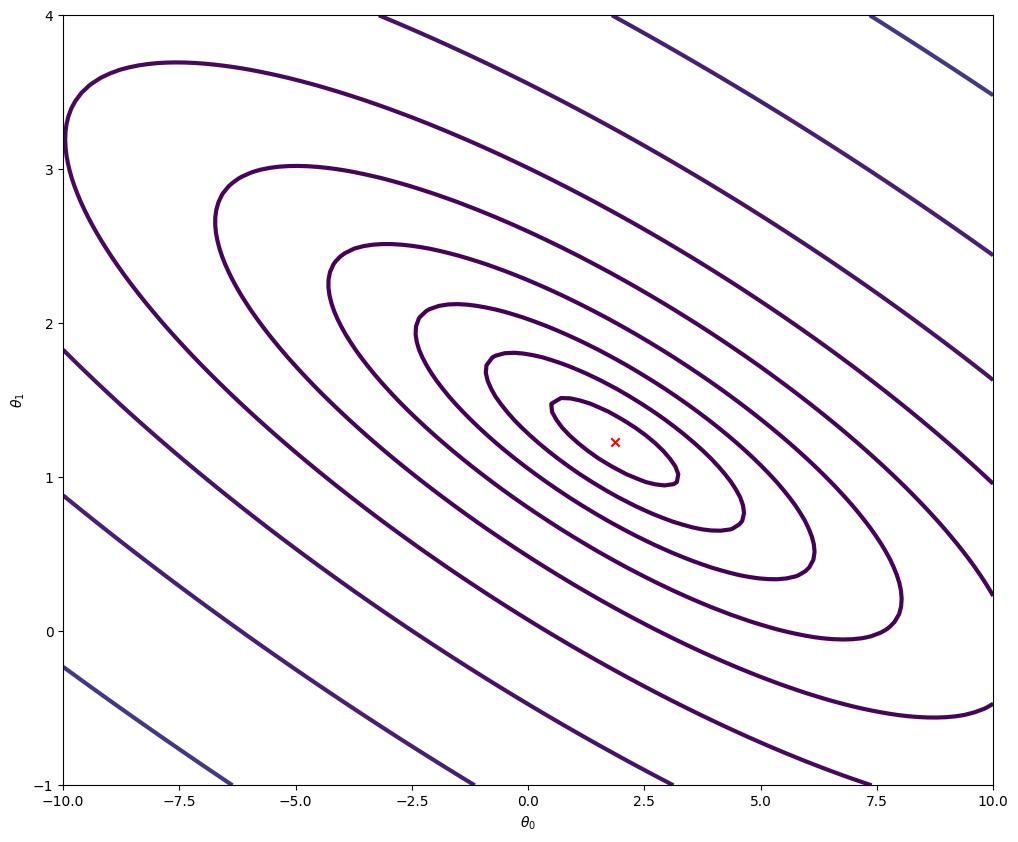

In [130]:
#Run this snippet before moving on to the next parts
#Don't change anything in this code snippet. But do look through it to see what it's doing.

import numpy as np
import matplotlib
from pylab import *
import numpy.linalg as spla


def plotCostFunction(x, y, bestthetas):

#Generate a bunch of theta0 and theta1 values on a linear scale
    theta0comb = np.linspace(-10, 10, 100);
    theta1comb = np.linspace(-1, 4, 100);

    #Create a 2D array to store the Jval corresponding to each unique theta0,theta1 pair
    Jvals = np.zeros((len(theta0comb), len(theta1comb)))

    # Compute the costs for each theta0,theta1 pair
    for i in range(len(theta0comb)):
        for j in range(len(theta1comb)):
            thh = np.array([[theta0comb[i]],[theta1comb[j]]])
            Jvals[j,i] = getCost(thh, x, y, len(y))


    figure(figsize=(12,10))
    xlabel(r'$\theta_0$')
    ylabel(r'$\theta_1$')

    #Draw the contour plot with cost levels that are spaced out logarithmically (for better viewing)
    levels = np.logspace(-2,3,20)#np.array([0,2,6,10,14,20,28,36,46,56])#np.arange(-2, 30, 4)
    contour(theta0comb, theta1comb, Jvals, levels, linewidths=3)

    #Finally, draw on the theta values for which the cost function is minimum with an X
    scatter(bestthetas[0,0], bestthetas[1,0], c='r', marker='x')



try:
    retthetas = spla.pinv(XMOD.T@XMOD)@XMOD.T@Y
    plotCostFunction(XMOD, Y, retthetas)
except Exception as e:
    printmd("### Something went wrong. Maybe you haven't implemented the steps above correctly/yet?")
    print(str(e))

If you did everything correctly i.e. implementing all the previous vectorized functions correctly, you should see a cost function generated in the cell above that looks similar (actually the same) as the one in the image below:

![costfunc-2.png](attachment:costfunc-2.png)

### 1.6.5 Implementing Gradient Descent - Vectorized Method

Below I've fleshed out a function ```gradDesc(theta, x, y, m, k_iters, lr)``` for you. I've put in the main for loop that carries out `k_iters` iterations of updates to all $\Theta$; you have to fill in code into the for loop to update all $\Theta$ simultaneously using the vectorized expression (below). Note that, in this case, you shouldn't loop through any individual data samples as you might have done in the iterative version. Rather, just focus on using the vectorized expression below and the update to all $\Theta$ will be done correctly. The update process can be expressed as the matrix operation:

$$
\large
\Theta = \Theta - \frac{\alpha}{m}X^T(X\Theta - y)
$$

where $\Theta$ is a vector of ($\theta_0$, $\theta_1$, $\ldots$, $\theta_n$) values, $\alpha$ is the learning rate, $m$ is the number of data samples, $X$ is a matrix containing your features but also includes a column of 1s as the first column representing feature $x_0$, $X^T$ is the transpose of $X$ and $y$ is the vector of output/target values. If you want to, feel free to confirm for yourself that the expression above is exactly the same as carrying out the update equations given in the previous section. Note that you can literally compute the above expression in one line of code.

**[2.5 marks]**

In [131]:
def gradDesc(theta, x, y, m, k_iters, lr):

    J_hist = []

    #FILL IN Your code here: make a call to the Iterative Cost Function to get the cost:
    costJ = getCost(theta, x, y, m) #Set this
    #STOP FILLING IN here

    J_hist.append(costJ)

    for ite in range(k_iters):


        #FILL IN Your code below - but there shouldn't be a loop in here
        error = np.dot(x, theta) - y
        gradient = np.dot(x.T, error) / m
        theta = theta - (lr * gradient)

        #STOP FILLING IN here

        #FILL IN Your code below: make a call to the Iterative Cost Function to get the cost:
        costJ = getCost(theta, x, y, m) #Set this

        #STOP FILLING IN here

        J_hist.append(costJ)

    return J_hist, theta


If you did it correctly, running ```gradDesc``` with initial $(\theta_0=0,\theta_1=0)$ with a ```lr=0.001``` over ```k_iters=100``` iterations, you should expect to end up with values of $\theta_0 \approx 0.28669954, \theta_1 \approx 1.35706138$, and this is exactly the same as running ```gradDescIter```, except that it is much faster and you can safely run it over a much larger number of iterations without clogging up your processor (although remember that ```gradDescIter``` takes in the original ```X``` that doesn't have the extra column of 1s).

In [132]:
#This code snippet is for YOU
#It just calls the gradient descent function. Feel free to play around with this to see what your function is doing.

THETA = np.array([[0],[0]]) #Change this to whatever thetas you like
LR = 0.001
K_ITERS = 100 #Be careful about setting this too large with iterative gradient descent... it can take a LONG time to finish

JHIST_1, THETA_VEC = gradDesc(THETA, XMOD, Y, M, K_ITERS, LR) #I wouldn't advise changing this

print(THETA_VEC)

[[0.28669954]
 [1.35706138]]


Now as before, select and run the cell below to see whether your code working correctly. The cell calls your function. Since this method is iterative and slow, it only runs it over a small number of iterations (100).

In [133]:
import utils
import importlib
importlib.reload(utils)

params = utils.params9(gradDesc,addX0)
utils.testCell(params)

______________________________

Test: Check vectorized gradient descent function costs
______________________________
Result: Passed! Mark: 0.5
______________________________

______________________________

Test: Check vectorized gradient descent function thetas
______________________________
Result: Passed! Mark: 2
______________________________

Looks good from the few tests done! Marks: 2.5


2.5

Just so you can see, the two cells below use the Jupyter magic command ```%timeit``` to time the two gradient descent alternatives. Run them and then compare the times. You should be able to see that the vectorized version is more than 10 times faster (it was actually about 17 times faster on my own machine). The gains would be even greater as the number of examples ```m``` increases.

In [ ]:
if DEBUG:
    raise NotImplementedError("Skipped during marking.")
THETA = np.array([[0],[0]])
%timeit gradDesc(THETA, XMOD, Y, M, 100, 0.01)

In [ ]:
if DEBUG:
    raise NotImplementedError("Skipped during marking.")
THETA = np.array([[0],[0]])
%timeit gradDescIter(THETA, X, Y, M, 100, 0.01)

***

## 1.7 Plotting the Cost $J$ versus Iteration Number

Assuming you implemented gradient descent correctly and it works, it should be able to return a list which contains the cost at each iteration of gradient descent as it runs. Plotting and observing this plot is key to determining if gradient descent is converging and whether the learning rate is: too small, too large, or just right. In practice, you will usually draw this plot as gradient descent runs in order to keep an eye on it and see "how things are going". We won't do that here (but feel free to see if you can create your own modified version of the vectorized gradient descent function that draws a plot of the cost at each iteration as gradient descent is running - NOT for marks).

In the code segment below, I've first made a call to your (vectorized) gradient descent function. Then, you need to  write the code to plot a graph of the cost $J$ versus the iteration number. All the data you will need is stored inside the variable ```RETJHIST```. Preferably use ```matplotlib```.

**[2 marks]**

To check that you're correct, given a learning rate of 0.005 and only 50 iterations in the function call below, your eventual graph should end up looking something like the figure below. But once you've got it right, feel free to continuously change the learning rate to see the effect; aim to keep increasing the learning rate until just before you see the cost $J$ skyrocket (instead of reduce). E.g. see what happens when you set the learning rate to 0.08444.

![costplot.png](attachment:costplot.png)

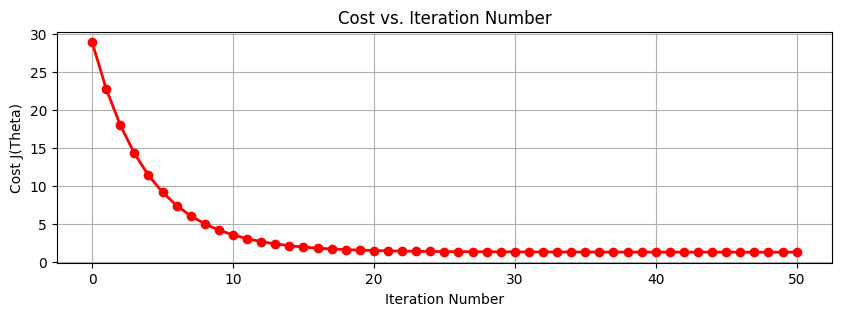

In [134]:
#Don't remove or modify the two lines below
THETA = np.array([[0],[0]]) #Creates a 2x1 column vector of zeros
RETJHIST, RETTHETA = gradDesc(THETA, XMOD, Y, M, 50, 0.005)  #Don't remove this, but feel free to change the learning rate


#Fill in below Import any libraries you may need for plotting inside the function here
import matplotlib.pyplot as plt
#Stop filling in here


def plotCostJ(jhist):
    #Fill in below
    fig, ax = plt.subplots(figsize=(10,3))
    ax.plot(range(len(jhist)), jhist, marker = 'o', color='red', linewidth=2)
    ax.set_title('Cost vs. Iteration Number')
    ax.set_xlabel('Iteration Number')
    ax.set_ylabel('Cost J(Theta)')
    ax.grid(True)
    #Stop filling in here
    return

plotCostJ(RETJHIST)

## 1.8 Making Predictions Using the $\theta$ (Model) Obtained

Now that we've hopefully implemented gradient descent and it has given us a good set of $\Theta_\text{best}$ to use to make predictions, we can go ahead and make predictions on some new set of data $X_\text{test}$. To do this, and noting that in this Section we only had one feature in $X$ and so we didn't need to do any feature scaling before carrying out gradient descent, we can go ahead and make predictions on new samples $X_\text{test}$ by simply doing the following:

1. Add feature $x_0$ to $X_\text{test}$.
2. Call the function ```predH``` written earlier with the $\Theta_\text{best}$ on the scaled $X_\text{test}$ with $x_0$.

Below, I've fleshed out a function ```makeAPredictionNoScaling(xtest, n, m, theta)``` that takes in the ```xtest``` that we're trying to predict on, coupled with the ```theta``` parameters (probably obtained via gradient descent previously), and then the function should proceed to do the following:

1. Uses the function ```addX0``` to add feature $x_0$ to ```xtest``` to get ```xtestmod```
2. Passes ```xtestmod``` to function ```predH``` to get the predicted values in ```ytestpred```.
3. Returns ```ytestpred```.

It's literally a bunch of function calls. If you got this far, this should be easy.

**[0.5 mark]**

In [135]:
def makeAPredictionNoScaling(xtest, n, m, theta):

    #Step 1: call addX0 to add feature x0 to xtestsc
    xtestmod = addX0(xtest, m)

    #Step 2: call predH to get predicted values for each example in xtestmod
    ytestpred = predH(theta, xtestmod, m)

    #Step 3: Return
    return ytestpred #DON'T CHANGE THIS LINE



To test out your function, you can call it with `X` and the $\Theta_\text{best}$ given below, and you should see that the predicted prices are extremely close to those in `Y`.

$$
\Theta_\text{best} = \left[\begin{array}[l]  _1.8667\\
 1.2311\end{array} \right]
$$

Also, given:

$$
X_\text{test} = \left[\begin{array}[lll] _4.33 \\
2.81\\
-2.57\\ \end{array} \right]
$$

the predicted $y_\text{test\_pred}$ values should be approximately:

$$
y_\text{test\_pred} \approx \left[\begin{array}{l}  7.197\\
 5.326\\
 -1.297 \end{array} \right]
$$



In [136]:
#This cell is for YOU to try your code.

THETATRY = np.array([[1.8667], [1.2311]])
XTRY = np.array([[4.33], [2.8], [-2.57]])

makeAPredictionNoScaling(XTRY,1,3,THETATRY)


array([[ 7.197363],
       [ 5.31378 ],
       [-1.297227]])

Select and run the cell below to see whether your code working correctly.

In [137]:
import utils
import importlib
importlib.reload(utils)

params = utils.params10(makeAPredictionNoScaling)
utils.testCell(params)

______________________________

Test: Check makeAPredictionNoScaling
______________________________
Result: Passed! Mark: 0.5
______________________________

Looks good from the few tests done! Marks: 0.5


0.5

# 2 - Multivariate Linear Regression

In this part, we're now going to consider a problem in which we're using more than one feature to predict the output. Consider the problem of trying to predict the price of a vehicle (in Rand) based on the vehicle's age (in years), mileage (in kms) and popularity index (which is some arbitrary index ranging from 1-10). The popularity index is a real-valued number between 1-10 which is measured by the national vehicle commission (made-up :D) by considering the overall demand for, and hype around, a particular vehicle type on the market at a given time. We've supposedly gone out and collected this data for 43 vehicles (found in file ```data2.csv```). We want to create a predictive model that can predict the price of a vehicle (in Rand) given the vehicle's age (in years), mileage (in kms) and popularity index at a given time.


## 2.1 Reading in the Data and Setting $n$, $m$, $y$ and $X$

I've put in the code below to read in the new data set.

In [138]:
#Run this snippet before moving on to the next parts
#Don't change anything in this code snippet. But do look through it to see what it's doing.

import numpy as np
np.set_printoptions(suppress=True) #This just prevents numpy from jumping into scientific display mode for very large/small numbers

DATA2 = np.genfromtxt('data2.csv',delimiter=',')

The data file consists of three columns. The data is displayed below to demonstrate that it is read in correctly.

In [139]:
DATA2

array([[603513.  ,     20.  , 119631.  ,      4.16],
       [400034.  ,      1.  , 198544.  ,      5.96],
       [525979.  ,     25.  , 149698.  ,      9.76],
       [517675.  ,     20.  , 152918.  ,      2.01],
       [211072.  ,     19.  , 271818.  ,      3.82],
       [428482.  ,     15.  , 187508.  ,      1.38],
       [ 51211.  ,      9.  , 333814.  ,      7.65],
       [420714.  ,     28.  , 190518.  ,      6.92],
       [837679.  ,     13.  ,  28825.  ,      2.93],
       [581208.  ,     12.  , 128283.  ,      4.75],
       [144034.  ,     28.  , 297813.  ,      6.79],
       [545170.  ,     24.  , 142256.  ,      6.95],
       [887211.  ,      6.  ,   9618.  ,      2.53],
       [688724.  ,     23.  ,  86587.  ,      8.93],
       [851172.  ,      8.  ,  23594.  ,      8.  ],
       [ 15000.  ,     35.  , 347849.  ,      2.21],
       [ 35999.  ,     38.  , 339706.  ,      8.82],
       [189688.  ,     22.  , 280110.  ,      7.74],
       [368728.  ,     38.  , 210676.  ,      

We'll also proceed to use your `obtainNandM` and `obtainYandX` functions to get $n$, $m$, $y$ and $X$ for this part as below:

In [140]:
NN,MM = obtainNandM(DATA2)
YY,XX = obtainYandX(DATA2)

3 43
3 43
[[603513.]
 [400034.]
 [525979.]
 [517675.]
 [211072.]
 [428482.]
 [ 51211.]
 [420714.]
 [837679.]
 [581208.]
 [144034.]
 [545170.]
 [887211.]
 [688724.]
 [851172.]
 [ 15000.]
 [ 35999.]
 [189688.]
 [368728.]
 [221548.]
 [759056.]
 [647369.]
 [438893.]
 [589980.]
 [870541.]
 [ 24662.]
 [513527.]
 [457006.]
 [619828.]
 [677386.]
 [562663.]
 [161036.]
 [246987.]
 [569590.]
 [900000.]
 [192264.]
 [668673.]
 [385997.]
 [888701.]
 [314247.]
 [562077.]
 [463245.]
 [537372.]]


Just run the cell below which just uses your previously written functions ```obtainNandM``` and ```obtainYandX``` to get $n$, $m$, $y$ and $X$ for this new data set. The cell below will tell you if your ```obtainNandM``` and ```obtainYandX``` operate correctly on ```DATA2```. If so, continue with the assignment. If not, you will meet with problems lower down on this assignment, and you should rather focus on fixing the problem observed. No marks for this; this is just a check for YOU to make sure everything is in order.

In [141]:
import utils
import importlib
importlib.reload(utils)

params = utils.params11(obtainNandM,obtainYandX,DATA2)
utils.testCell(params)

3 43
3 43
3 43
[[603513.]
 [400034.]
 [525979.]
 [517675.]
 [211072.]
 [428482.]
 [ 51211.]
 [420714.]
 [837679.]
 [581208.]
 [144034.]
 [545170.]
 [887211.]
 [688724.]
 [851172.]
 [ 15000.]
 [ 35999.]
 [189688.]
 [368728.]
 [221548.]
 [759056.]
 [647369.]
 [438893.]
 [589980.]
 [870541.]
 [ 24662.]
 [513527.]
 [457006.]
 [619828.]
 [677386.]
 [562663.]
 [161036.]
 [246987.]
 [569590.]
 [900000.]
 [192264.]
 [668673.]
 [385997.]
 [888701.]
 [314247.]
 [562077.]
 [463245.]
 [537372.]]
3 43
[[603513.]
 [400034.]
 [525979.]
 [517675.]
 [211072.]
 [428482.]
 [ 51211.]
 [420714.]
 [837679.]
 [581208.]
 [144034.]
 [545170.]
 [887211.]
 [688724.]
 [851172.]
 [ 15000.]
 [ 35999.]
 [189688.]
 [368728.]
 [221548.]
 [759056.]
 [647369.]
 [438893.]
 [589980.]
 [870541.]
 [ 24662.]
 [513527.]
 [457006.]
 [619828.]
 [677386.]
 [562663.]
 [161036.]
 [246987.]
 [569590.]
 [900000.]
 [192264.]
 [668673.]
 [385997.]
 [888701.]
 [314247.]
 [562077.]
 [463245.]
 [537372.]]
______________________________



0

## 2.2 Feature Scaling

When working with multiple features, feature scaling becomes very important. We didn't scale our data in Section 1 above because our data only had one feature. The data we're working with here, though, has 3 features. Feature scaling is especially important when the ranges of different features differ by orders of magnitude, and hopefully you can see that this is, in fact, the case with our data in this section. As discussed in class, feature scaling can be achieved by means of the following expression applied to each and every entry in $x_j^{(i)}$ in $X$:

$$
x_j^{(i)} = \frac{x_j^{(i)}-\mu_j}{s_j}    \text{ for all $m$ data samples}
$$

where $x_j^{(i)}$ is the $j$th feature of the $i$th data sample, $\mu_j$ is the average/mean value of feature $x_j$ across all the data samples, and $s_j$ is the standard deviation of values of $x_j$ across all the data samples (although the range can also be used - don't use it here).

Below, I've fleshed out a function ```obtainScaledX(x,n)```. Complete the function to scale the features of the input array ```x```. Note that the input array ```x``` that this function expects **excludes** the extra column of 1s for feature $x_0$ i.e. in your function, assume that ```x``` doesn't have feature $x_0$ which is a column of 1s, and which shouldn't be scaled in any case. The function provides two variables ```means``` and ```stdevs``` which are both initialized to $(1\times n)$ row vectors, because they will contain, respectively, the mean and standard deviation of each column in ```x```. Put the scaled values of ```x``` inside the ```xsc``` array provided in the function. ```xsc``` is returned by the function. You could follow the following steps, in which case there will be one loop below:

For each feature (i.e. column) in ```x```:
    
1. Compute the mean (```mean```) of the column and store it in the corresponding column entry of variable ```means``` provided.
    
2. Now subtract the mean of this column from the entire column and store the result in the corresponding column of ```xsc```.

3. Compute the standard deviation of the column and store it in the corresponding column entry of variable ```stdevs``` provided.

4. Divide the entire column by this standard deviation and store the result in the corresponding column in ```xsc```.

If you use this method, note that, while you will be looping through the features/columns, you shouldn't be looping through the individual samples. Rather, use matrix arithmetic to apply feature scaling to all the feature values at the same time e.g. subtracting a numpy array $A$ by a fixed value $b$ results in subtracting every individual item in $A$ by $b$ in one go; this is called "broadcasting". Feel free to look up how broadcasting works in ```numpy```. The same is true of division, multiplication and addition. So consider applying ```mean```, ```std``` and other operations directly to entire columns of ```X``` e.g. ```X[:,0:1]``` is the entire first column of ```X```.

There is an alterative way to carry out scaling in one line of code, which will involve using `numpy` indexing and functions.

Finally, the function returns ```xsc```, but also ```means``` and ```stdevs```. These need to be returned so they can be applied to future new test samples that need to first be scaled before they can be passed into the final hypothesis of this model. So given some new sample (i.e. vehicle) with a given age, mileage and popularity index, we would need to apply the feature scaling procedure to the sample before passing it through our hypothesis to make a prediction on its price. This is because the model will have been trained on scaled data. We need to be consistent.

Hint: ```numpy```'s ```mean``` and ```std``` functions may be useful here.



**[2.5 marks]**

In [142]:
def obtainScaledX(x,n):

    xsc = np.zeros_like(x)
    means = np.zeros((1,n))
    stdevs = np.zeros((1,n))

    #Don't change anything above this point.
    #Start filling in below with your feature scaling code. Follow instructions above
    for i in range(n):
        col = x[:,i]

        mean = np.mean(col)
        means[0, i] = mean

        stdev = np.std(col)
        stdevs[0, i] = stdev

        xsc[:, i] = (col - mean) / stdev
    #Stop filling in here. Don't change anything below

    return stdevs,means,xsc

STD,MN,XSC = obtainScaledX(XX,NN)

In [143]:
#This code snippet is for YOU
#It just calls the feature scaling function. Feel free to play around here to see what your function is doing.
STDEVS,MEANS,XSCALED = obtainScaledX(XX,NN) #I wouldn't advise changing this, but you can if you want to
print(STDEVS)
print(MEANS)
print(XSCALED)

[[   11.0713796  96916.0253914      2.41072538]]
[[    19.51162791 168106.90697674      5.4227907 ]]
[[ 0.04411122 -0.50018464 -0.52382188]
 [-1.6720254   0.31405635  0.22284135]
 [ 0.49572612 -0.18994699  1.79913039]
 [ 0.04411122 -0.15672235 -1.41566963]
 [-0.04621176  1.07011294 -0.66485827]
 [-0.40750368  0.20018457 -1.67700176]
 [-0.94944156  1.70980075  0.92387516]
 [ 0.76669506  0.23124239  0.62106174]
 [-0.58814964 -1.43714011 -1.03404175]
 [-0.67847262 -0.41091148 -0.27908226]
 [ 0.76669506  1.33833484  0.56713606]
 [ 0.40540314 -0.26673511  0.63350613]
 [-1.2204105  -1.63532198 -1.19996691]
 [ 0.31508016 -0.8411396   1.45483568]
 [-1.03976454 -1.49111467  1.06905968]
 [ 1.39895593  1.85461684 -1.33270704]
 [ 1.66992487  1.77059565  1.40920626]
 [ 0.22475718  1.15567155  0.96120832]
 [ 1.66992487  0.43923688  1.14787413]
 [-1.40105646  1.02823132  0.19380445]
 [ 0.31508016 -1.12256881 -1.00915298]
 [-1.49137944 -0.67561486  1.59587207]
 [-0.04621176  0.15852995  0.37632213]
 [

Select and run the cell below to see whether your code working correctly. The cell below indicates whether or not your feature scaling function is apparently working correctly.

In [144]:
import utils
import importlib
importlib.reload(utils)

params = utils.params12(obtainScaledX)
utils.testCell(params)


______________________________

Test: Check StdDevs
______________________________
Result: Passed! Mark: 0.5
______________________________

______________________________

Test: Check Means
______________________________
Result: Passed! Mark: 0.5
______________________________

______________________________

Test: Check X_scaled
______________________________
Result: Passed! Mark: 1.5
______________________________

Looks good from the few tests done! Marks: 2.5


2.5

## 2.3 Adding Feature $\large x_0$

Here, we'll just call your ```addX0``` function to add the feature $\large x_0$ to the scaled $X$ so we can proceed to carry out gradient descent on it. Specifically, ```addX0``` will be run on ```XSCALED``` to obtain ```XXMOD``` which is the scaled version of $X$ with feature $\large x_0$.

Just run the cell below which will tell you if it operates correctly. If so, continue with the assignment. If not, you will meet with problems lower down on this assignment, and you should rather focus on fixing the problem observed.

In [145]:
XXMOD = addX0(XSCALED,MM)
print(XXMOD)

[[ 1.          0.04411122 -0.50018464 -0.52382188]
 [ 1.         -1.6720254   0.31405635  0.22284135]
 [ 1.          0.49572612 -0.18994699  1.79913039]
 [ 1.          0.04411122 -0.15672235 -1.41566963]
 [ 1.         -0.04621176  1.07011294 -0.66485827]
 [ 1.         -0.40750368  0.20018457 -1.67700176]
 [ 1.         -0.94944156  1.70980075  0.92387516]
 [ 1.          0.76669506  0.23124239  0.62106174]
 [ 1.         -0.58814964 -1.43714011 -1.03404175]
 [ 1.         -0.67847262 -0.41091148 -0.27908226]
 [ 1.          0.76669506  1.33833484  0.56713606]
 [ 1.          0.40540314 -0.26673511  0.63350613]
 [ 1.         -1.2204105  -1.63532198 -1.19996691]
 [ 1.          0.31508016 -0.8411396   1.45483568]
 [ 1.         -1.03976454 -1.49111467  1.06905968]
 [ 1.          1.39895593  1.85461684 -1.33270704]
 [ 1.          1.66992487  1.77059565  1.40920626]
 [ 1.          0.22475718  1.15567155  0.96120832]
 [ 1.          1.66992487  0.43923688  1.14787413]
 [ 1.         -1.40105646  1.02

Select and run the cell below to see whether your code is working correctly.

In [146]:
import utils
import importlib
importlib.reload(utils)

params = utils.params13(addX0)
utils.testCell(params)


______________________________

Test: Check addX0 function (no marks)
______________________________
Result: Passed! Mark: 0
______________________________

Looks good from the few tests done! Marks: 0


0

## 2.4 Gradient Descent for Multiple Features

Now that the features are scaled, we can perform gradient descent for multiple features. You might be very pleased to hear that if you implemented the vectorized version of gradient descent for one variable earlier on, you can simply use that function with more features, and it *should* work. No coding required here. We'll just call the function and it *should* just work. If you run ```gradDesc``` for 10000 iterations on ```XXMOD``` and ```YY``` with initial $\Theta = (\theta_0=0,\theta_1=0,\ldots,\theta_3=0)$ and $\alpha=0.01$, you should end up with the approximate best-fit parameters for this data set of:

$$
\Theta_\text{best} = \left[  \begin{array}[l]  _\theta_0\approx478510.3 \\ \theta_1\approx-6.714 \\ \theta_2\approx-249916.5 \\ \theta_3\approx0.8857 \end{array} \right ]
$$

**[2 marks if it works]**

In [148]:
#This cell is for YOU to try out

#This code snippet is for YOU
#It just calls the gradient descent function. Feel free to play around with this to see what your function is doing.

THETA = np.zeros((NN+1,1)) #Create a column vector of zeros of size ((n+1)x1) i.e. set theta_0, theta_1... theta_n initially to 0
LR = 0.01
K_ITERS = 10000 #You should be able to set this nice and high if you like, but if you overdo it, your notebook may freeze.

JHIST_P2, THETA_VEC_P2 = gradDesc(THETA, XXMOD, YY, MM, K_ITERS, LR) #I wouldn't advise changing this

print(THETA_VEC_P2)


[[ 478510.25581395]
 [     -6.71425415]
 [-249916.49386609]
 [      0.8857141 ]]


Select and run the cell below to see whether your code is apparently working correctly.

In [149]:
import utils
import importlib
importlib.reload(utils)

params = utils.params14(gradDesc)
utils.testCell(params)



______________________________

Test: Check vectorized gradient descent function costs (multi-features)
______________________________
Result: Passed! Mark: 0.5
______________________________

______________________________

Test: Check vectorized gradient descent function thetas (multi-features)
______________________________
Result: Passed! Mark: 1.5
______________________________

Looks good from the few tests done! Marks: 2.0


2.0

## 2.5 Plotting the Cost $J$ versus Iteration Number and Comparing Learning Rates

As with Section 1, assuming you implemented gradient descent correctly and it works, it should be able to return a list which contains the cost at each iteration of gradient descent as it runs. Plotting and observing this plot is key to determining if gradient descent is converging and whether the learning rate is: too small, too large, or just right. In practice, you will usually draw this plot as gradient descent runs in order to keep an eye on it and see "how things are going". We won't do that here (but feel free to see if you can create your own modified version of the vectorized gradient descent function that draws a plot of the cost at each iteration as gradient descent is running - NOT for marks).

Previously (in Section 1), we plotted a graph of $J$ versus iteration number for a single learning rate. While that plot *can* be used to compare learning rates, this would require us to keep changing the learning rate, re-running gradient descent and re-plotting the graph in order to see how convergence is changing. This is not ideal. Below, I've graciously put in code that plots the cost versus the iteration number of gradient descent **for a series of different learning rates**. The function can plot the cost plot for up to 7 different learning rates on a single graph, and the function runs gradient descent by itself, so there is no need to do that manually either.

Look at the graphs, and make sure to make changes to the learning rates in the ```alphatotry``` list and compare different learning rates and determine the best learning rate to use. As explained in class, when the learning rate is small, the cost reduces very slowly. As you increase the learning rate, convergence become faster and faster i.e. the cost plot drops more and more dramatically to a stable minimum; from a specific learning rate onwards, as the learning rate is set too high, the plot may still converge but convergence starts to become slower and slower as gradient descent starts to overshoot the minimum but still reduces the cost on every iteration; then at some point (when the learning rate is just too high), the cost plot explodes / diverges. Keep changing values in ```alphatotry``` (maximum seven entries) to try and observe this trend. Start small and gradually increase the learning rate; initially it will start to converge faster and faster; then convergence will start to become less and less steep; at some point you should see that it explodes. The learning rate that causes the explosion is obviously too high. Then work your way down systematically to the point where it doesn't explode (converges) and also does so the fastest. This is for marks; you will have to put the best learning rate you determined into a function lower down.

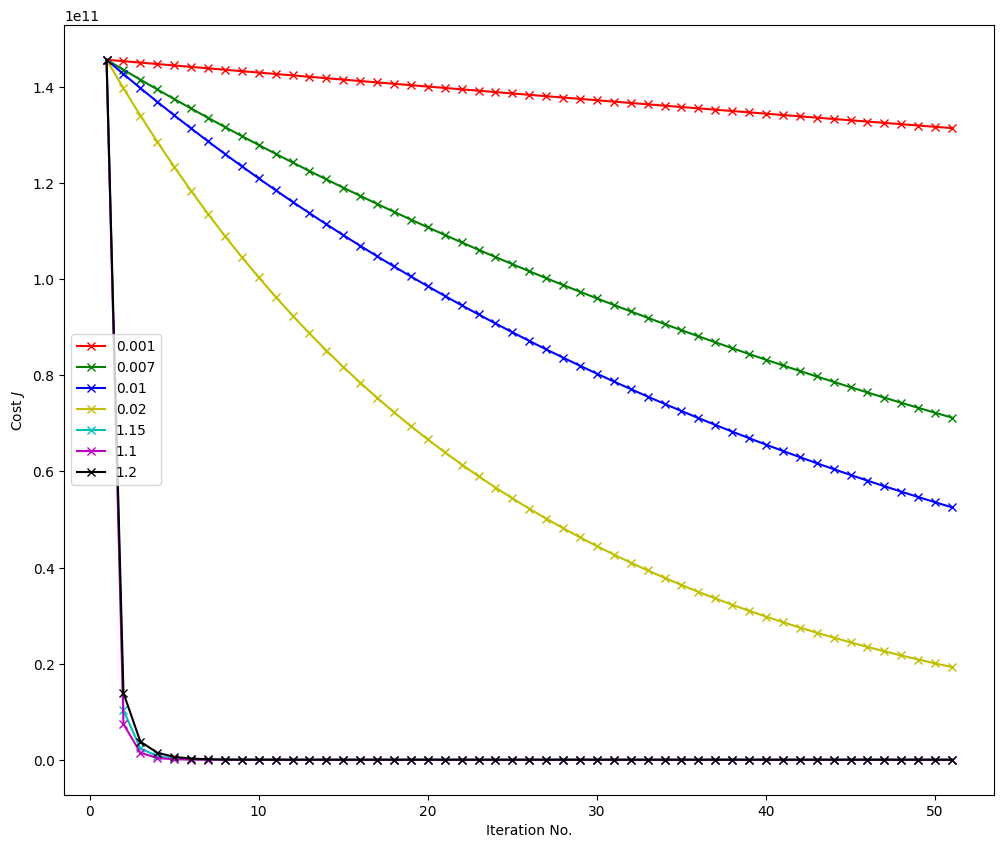

In [150]:
#Don't change anything except variable ``alphatotry`` in this code snippet (unless you really want to). Note that
#you can have up to seven learning rates in the ``alphatotry`` list, which the plot will automatically draw
#and you can then compare. You can, however, have fewer than seven items in the list too.
#But do look through it to see what it's doing.

alphatotry = [0.001, 0.007, 0.01, 0.02, 1.15 , 1.1 , 1.2]

#Don't edit anything below this point (unless you insist on doing so)

import numpy as np
import matplotlib
from pylab import *

def plotLearningRates(x,y,alphas):

    plotcol = ['r','g','b','y','c','m','k']

    retJhistforalphas = []
    for alphait in alphas:
        retJ_hist,_ = gradDesc(np.zeros((x.shape[1],1)), x, y, len(x), 50, alphait)
        retJhistforalphas.append(retJ_hist)

    xplot = np.linspace(1,len(retJhistforalphas[0]),int(len(retJhistforalphas[0])))

    figure(figsize=(12,10))

    for it, retJhistit in enumerate(retJhistforalphas):
        plot(xplot, np.array(retJhistit), c=plotcol[it], marker='x',label=str(alphas[it]))

    xlabel('Iteration No.')
    ylabel('Cost $ J$')
    legend()
    show()

try:
    plotLearningRates(XXMOD, YY, alphatotry)
except Exception as e:
    printmd("### Something went wrong.")
    print(str(e))

Ok now in the function below, you will need to set the value of alpha to the best learning rate you determined. This is for marks. The closer your answer is to the correct learning rate, the more marks you get. If your learning rate causes a divergence of gradient descent, you get nothing. No immediate feedback cell for this one either.

**[1 mark]**

In [151]:
def setLearningRatePart2():

    alpha = 1.1 #Set this correctly; set this to the best learning rate


    return alpha #Don't change this

## 2.6 Making Predictions Using the $\theta$ (Model) Obtained

Now that we've hopefully implemented gradient descent and it has given us a good set of $\Theta_\text{best}$ to use to make predictions, we can go ahead and make predictions on some new set of data $X_\text{test}$. To do this, and noting that in this Section we had to carry out feature scaling in order to make gradient descent obtain a solution faster, we will need to do the following:

1. Scale $X_\text{test}$ using the **same** scaling parameters obtained from the training set.
2. Add feature $x_0$ to $X_\text{test}$.
3. Call the function ```predH``` written earlier with the $\Theta_\text{best}$ on the scaled $X_\text{test}$ with $x_0$.

Therefore, below we'll do this in two parts: we'll first write a function to scale a given $X_\text{test}$ using existing scaling parameters; then we'll write a function that carries out all three steps listed above to make predictions.

### 2.6.1 Feature Scaling of an $X_\text{test}$ Using Existing Scaling Parameters

You might be pleased to know that doing this is literally as simple as applying the expression below, and in this case we already have $\mu_j$ and $s_j$, which we would have obtained from our previously written ```obtainScaledX``` function. It will therefore be extremely similar to the previous scaling function we wrote.

$$
x_j^{(i)} = \frac{x_j^{(i)}-\mu_j}{s_j}    \text{ for all $m$ data samples}
$$

where $x_j^{(i)}$ is the $j$th feature of the $i$th data sample, $\mu_j$ is the average/mean value of feature $x_j$ across all the data samples, and $s_j$ is the standard deviation of values of $x_j$ across all the data samples (although the range can also be used - don't use it here).

Below, I've fleshed out a function ```obtainScaledXTest(x,n,stdevs,means)```. Complete the function to scale the features of the input array ```x```. Note that the input array ```x``` that this function expects **excludes** the extra column of 1s for feature $x_0$ i.e. in your function, assume that ```x``` doesn't have feature $x_0$ which is a column of 1s, and which shouldn't be scaled in any case. The function additionally **takes in** ```means``` and ```stdevs``` which are both $(1\times n)$ row vectors obtained previously, and they will contain, respectively, the mean and standard deviation of each column in ```x```. Put the scaled values of ```x``` inside the ```xsc``` array provided in the function. ```xsc``` is returned by the function. You could follow the following steps (and note that there is one loop below):

For each feature (i.e. column) in ```x```:
 1. Subtract the mean of this column from the entire column and store the result in the corresponding column of ```xsc```.
 2. Divide the entire column by this standard deviation and store the result in the corresponding column in ```xsc```.

You could also do it in one line using `numpy`. Finally, the function returns ```xsc``` only.

Hint: This will look almost identical to what you had in the ```obtainScaledX``` function before.

While you might be looping through the features/columns, you shouldn't be looping through the individual samples. Rather, use matrix arithmetic to apply feature scaling to all the feature values at the same time e.g. subtracting a numpy array $A$ by a fixed value $b$ results in subtracting every individual item in $A$ by $b$ in one go; this is called "broadcasting". Feel free to look up how broadcasting works in ```numpy```. The same is true of division, multiplication and addition. So consider applying ```mean```, ```std``` and other operations directly to entire columns of ```X``` e.g. ```X[:,0:1]``` is the entire first column of ```X```.

**[1 mark]**

In [152]:
def obtainScaledXTest(x,n,stdevs,means):

    xsc = np.zeros_like(x)

    #Don't change anything above this point.
    #Start filling in below with your feature scaling code. Follow instructions above
    for i in range(n):
        col = x[:,i]
        mean = means[0, i]
        stdev = stdevs[0, i]

        xsc[:, i] = (col - means[0, i]) / stdevs[0, i]

    #Stop filling in here. Don't change anything below

    return xsc

XTESTSC = obtainScaledXTest(XX,NN,STD,MN)

To test out your function, given:

$$
X_\text{test} = \left[\begin{array}[ll] _2 & 3\\
4 & 5\\
6 & 7\end{array}\right]
$$

with:

$$
\mu = \left[\begin{array}[l] _2.6 & 3.4\end{array}\right]
$$

and

$$
\text{StdDev} = \left[\begin{array}[l] _0.4 & 0.5\end{array}\right]
$$

should give you approximately:

$$
X_\text{test\_scaled} \approx \left[\begin{array}[r] _-1.5 & -0.8\\
3.5 & 3.2\\
8.5 & 7.2\end{array}\right]
$$

Hint: If you run this example, make sure that your setup your $\mu$ and StdDev arrays such that the ```shape``` of these arrays is ```(1,2)```.


In [153]:
#This code snippet is for YOU
#It just calls the feature scaling function. Feel free to play around here to see what your function is doing.
XTESTSCALED = obtainScaledXTest(XX,NN,STD,MN) #I wouldn't advise changing this
print(XTESTSCALED)

[[ 0.04411122 -0.50018464 -0.52382188]
 [-1.6720254   0.31405635  0.22284135]
 [ 0.49572612 -0.18994699  1.79913039]
 [ 0.04411122 -0.15672235 -1.41566963]
 [-0.04621176  1.07011294 -0.66485827]
 [-0.40750368  0.20018457 -1.67700176]
 [-0.94944156  1.70980075  0.92387516]
 [ 0.76669506  0.23124239  0.62106174]
 [-0.58814964 -1.43714011 -1.03404175]
 [-0.67847262 -0.41091148 -0.27908226]
 [ 0.76669506  1.33833484  0.56713606]
 [ 0.40540314 -0.26673511  0.63350613]
 [-1.2204105  -1.63532198 -1.19996691]
 [ 0.31508016 -0.8411396   1.45483568]
 [-1.03976454 -1.49111467  1.06905968]
 [ 1.39895593  1.85461684 -1.33270704]
 [ 1.66992487  1.77059565  1.40920626]
 [ 0.22475718  1.15567155  0.96120832]
 [ 1.66992487  0.43923688  1.14787413]
 [-1.40105646  1.02823132  0.19380445]
 [ 0.31508016 -1.12256881 -1.00915298]
 [-1.49137944 -0.67561486  1.59587207]
 [-0.04621176  0.15852995  0.37632213]
 [-1.40105646 -0.44599339 -0.54041439]
 [-1.2204105  -1.56861475 -0.85152407]
 [ 0.67637208  1.81598546

Select and run the cell below to see whether your code working correctly. The cell below indicates whether or not your feature scaling function is apparently working correctly.

In [154]:
import utils
import importlib
importlib.reload(utils)

params = utils.params15(obtainScaledXTest)
utils.testCell(params)


______________________________

Test: Check obtainScaledXTest
______________________________
Result: Passed! Mark: 1
______________________________

Looks good from the few tests done! Marks: 1


1

### 2.6.2 Making the Prediction (With Scaling)

Below, I've fleshed out a function ```makeAPredictionWithScaling(xtest, n, m, theta, stdevs, means)``` that takes in scaling parameters ```stdevs``` and ```means``` along with the ```xtest``` that we're trying to predict on, coupled with the ```theta``` parameters (probably obtained via gradient descent previously), and then the function should proceed to:

1. Calls the ```obtainScaledXTest``` function on ```xtest``` with ```stdevs``` and ```means``` to get the scaled ```xtestsc```.
2. Uses the function ```addX0``` to add feature $x_0$ to ```xtestsc``` to get ```xtestmod```
3. Passes ```xtestmod``` to function ```predH``` to get the predicted values in ```ytestpred```.
4. Returns ```ytestpred```.

It's literally a bunch of function calls. If you got this far, this should be easy.

**[1.5 marks]**

In [155]:
def makeAPredictionWithScaling(xtest, n, m, theta, stdevs, means):

    #Step 1: call obtainScaledXTest to set xtestsc correctly
    xtestsc = obtainScaledXTest(xtest, n, stdevs, means)

    #Step 2: call addX0 to add feature x0 to xtestsc
    xtestmod = addX0(xtestsc, m)

    #Step 3: call predH to get predicted values for each example in xtestmod
    ytestpred = predH(theta, xtestmod, m)

    #Step 4: Return
    return ytestpred #DON'T CHANGE THIS LINE



To test out your function, you can call it with `XX` and the $\Theta_\text{best}$ given below, and you should see that the predicted prices are extremely close to those in `YY`.

$$
\Theta_\text{best} = \left[\begin{array}[c]  _478510\\
 -6.714\\
 -249916\\
 0.8857 \end{array} \right]
$$

Also, given:

$$
X_\text{test} = \left[\begin{array}[lll] _5.0 & 28000.0 & 7.89\\
2.0 & 98000.0 & 4.89\\
30.0 & 280000.0 & 9.89\\ \end{array} \right]
$$

the predicted $y_\text{test\_pred}$ values should be approximately:

$$
y_\text{test\_pred} \approx \left[\begin{array}[l]  _839811\\
 659304\\
 189968 \end{array} \right]
$$



In [156]:
#This cell is for YOU to try your code.

THETA = np.zeros((NN+1,1))
JHIST, THETATRY = gradDesc(THETA, XXMOD, YY, MM, 100, 0.1) #Run gradient descent to get the best THETAS again

makeAPredictionWithScaling(XX,NN,MM,THETATRY,STD,MN) #Use the best THETAS to make predictions

THETATRY = np.array([[478510], [-6.714], [-249916], [0.8857]])
XTRY = np.array([[5.0, 28000.0, 7.89], [2.0, 98000.0, 4.89], [30.0, 280000.0, 9.89]])

makeAPredictionWithScaling(XTRY,3,3,THETATRY,STD,MN)


array([[839811.42934563],
       [659304.12488059],
       [189968.12584892]])

Select and run the cell below to see whether your code working correctly.

In [157]:
import utils
import importlib
importlib.reload(utils)

params = utils.params16(makeAPredictionWithScaling)
utils.testCell(params)



______________________________

Test: Check obtainScaledXTest
______________________________
Result: Passed! Mark: 1.5
______________________________

Looks good from the few tests done! Marks: 1.5


1.5

***
## 3. Using sklearn for Linear Regression

It is effortless. The small snippet of code below does **exactly** what we've been doing up to now. Note that `sklearn`'s `model.fit` expects $X$ that isn't scaled and doesn't contain feature $x_0$. You can feed in the raw features and it do everything for you...

Anyway, analyze the code below to determine how one can get the $\Theta$ parameters using sklearn for yourself.

Hint: Remember that $\theta_0$ is actually the y-intercept of the hypothesis.

Note that since we didn't apply any scaling, the $\Theta$ values we get here will be different to those we obtained above when we applied gradient descent to the scaled $X$.

In [158]:
#Run this snippet just to see what it does. You may also play around with it if you want
if DEBUG:
    raise NotImplementedError("Skipped during marking")

import sklearn.linear_model as lm
model = lm.LinearRegression()
try:
    model.fit(XX,YY)
    printmd("The y-intercept i.e. $\\theta_0$ is " + str(model.intercept_))
    printmd("The coefficients i.e. " + ", ".join(["$\\theta_%i$" % i for i in range(1,NN+1)]) + " are " + np.array2string(model.coef_,separator=", "))
except Exception as e:
    printmd("### Something went wrong. Check your function.")
    print(str(e))

printmd("***")


The y-intercept i.e. $\theta_0$ is [912015.88419592]

The coefficients i.e. $\theta_1$, $\theta_2$, $\theta_3$ are [[-0.60645144, -2.57869112,  0.36740564]]

***

And making a prediction is just as effortless. We'll make predictions on ``XX``.

In [159]:
if DEBUG:
    raise NotImplementedError("Skipped during marking")

print(model.predict(XX))

[[603513.88644021]
 [400033.81815516]
 [525979.40581046]
 [517676.2052741 ]
 [211071.1028027 ]
 [428482.08029506]
 [ 51210.03993086]
 [420714.37158843]
 [837678.30535009]
 [581208.11926838]
 [144033.66032273]
 [545169.59915202]
 [887211.32385086]
 [688724.0889131 ]
 [851172.33359202]
 [ 15000.34366586]
 [ 35999.23463647]
 [189688.21692824]
 [368727.51812304]
 [221547.86735189]
 [759055.70676632]
 [647368.97994537]
 [438891.64919046]
 [589980.28921549]
 [870540.3943939 ]
 [ 24662.39401071]
 [513526.43741999]
 [457004.95716932]
 [619828.4459658 ]
 [677387.0705076 ]
 [562662.55544165]
 [161037.21426393]
 [246987.12407573]
 [569590.44746337]
 [900000.30737398]
 [192264.62126272]
 [668672.51611517]
 [385997.10817013]
 [888701.00614061]
 [314246.83673654]
 [562077.29469366]
 [463245.08223781]
 [537371.03998807]]



**DONE**